In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This snippet of code adds the source code to the PYTHONPATH.  It assumes that the notebook and source directories are under the same parent directory.  If the directory structure has been changed then os.path.join(sys.path[0],'..','source') will need to be replaced with the new path to source.  This isn't a very clean solution but it is the only one I can find that will work.

In [6]:
import sys
import os
sys.path.append(os.path.join(sys.path[0],'..','source'))

This notebook provides examples of how to read spectral libraries using the envi module of pySpectral, calculate MODIS broadband albedos using MODIS spectral response functions and calculate band ratios.

# Import spectral libraries

In [14]:
from spectral.io import envi
from constants import ICE_LIBRARY_PATH, POND_LIBRARY_PATH, OWTR_LIBRARY_PATH

# Ice
ice = envi.open(ICE_LIBRARY_PATH)
# Ponds
pond = envi.open(POND_LIBRARY_PATH)

# Leads
lead = envi.open(OWTR_LIBRARY_PATH)


# Convert spectral albedos into modis broad band albedos and put into a pandas data frame

In [8]:
from seaice_albedo_utilities import modis_srf, modis_bbalbedo, spectra2modis

# Get spectral response function
wv, srf = modis_srf()

# Calculate MODIS band albedos for ice, pond and lead spectra
ice_df = spectra2modis(ice, wv, srf, code='I')
pond_df = spectra2modis(pond, wv, srf, code='P')
lead_df = spectra2modis(lead, wv, srf, code='L')

## For plotting purposes split pond into light, dark and with ice sub-types 

In [9]:
import pandas as pd

pond_df['subtype'] = 'Melt Pond'
pond_df['subtype'].loc[pond_df['target'].str.contains('Light')] = 'Light Pond'
pond_df['subtype'].loc[pond_df['target'].str.contains('Dark')] = 'Dark Pond'
pond_df['subtype'].loc[pond_df['target'].str.contains('frazil|brash')] = 'Icey Pond'

alldf = pd.concat([ice_df, pond_df, lead_df])

/home/apbarret/builds/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Plot band albedos as parallel axis plots

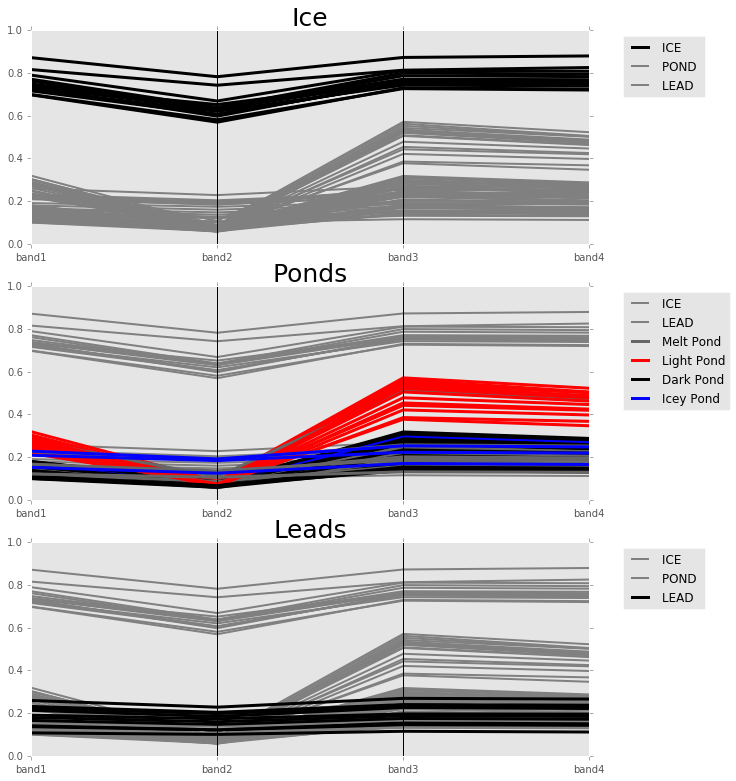

In [11]:
from pandas.plotting import parallel_coordinates
matplotlib.style.use('ggplot')

f, ax = plt.subplots(3,1, figsize=(10, 13))
parallel_coordinates(ice_df, 'sftype', cols=['band1','band2','band3','band4'], color=['k'], lw=3, ax=ax[0])
parallel_coordinates(pond_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[0])
parallel_coordinates(lead_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[0])
ax[0].set_ylim(0,1.0)
ax[0].xaxis.label.set_size(30)
ax[0].set_title("Ice", fontsize=25)
lgd0 = ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2)

parallel_coordinates(ice_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[1])
parallel_coordinates(lead_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[1])
parallel_coordinates(pond_df, 'subtype', cols=['band1','band2','band3','band4'], color=['0.4','red','k','blue'], lw=3, ax=ax[1])
ax[1].set_ylim(0,1.0)
ax[1].set_title("Ponds", fontsize=25)
lgd1 = ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2)

parallel_coordinates(ice_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[2])
parallel_coordinates(pond_df, 'sftype', cols=['band1','band2','band3','band4'], color=['grey'], lw=2, ax=ax[2])
parallel_coordinates(lead_df, 'sftype', cols=['band1','band2','band3','band4'], color=['k'], lw=3, ax=ax[2])
ax[2].set_ylim(0,1.0)
ax[2].set_title("Leads", fontsize=25)
lgd2 = ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2)

# For writing plot to file
# plotfile = "" # Define plot file
#f.savefig(plotfile, bbox_extra_artists=(lgd0, lgd1, lgd2,), bbox_inches='tight')